## Help NGO Case Study

#### Problem Statement:

- HELP International is an international humanitarian NGO that is committed to fighting poverty and providing the people of backward countries with basic amenities and relief during the time of disasters and natural calamities. It runs a lot of operational projects from time to time along with advocacy drives to raise awareness as well as for funding purposes.

- After the recent project that included a lot of awareness drives and funding programmes, they have been able to raise around $ 10 million. Now the CEO of the NGO needs to decide how to use this money strategically and effectively. The significant issues that come while making this decision are mostly related to choosing the countries that are in the direst need of aid. 

- And this is where you come in as a data analyst. Your job is to categorise the countries using some socio-economic and health factors that determine the overall development of the country. Then you need to suggest the countries which the CEO needs to focus on the most. 

## Reading and Understanding the data :

In [446]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [447]:
# Importing Pandas and NumPy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [448]:
ngo_data = pd.read_csv("Country-data.csv")
ngo_data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


**Explaining the meaning of varibles in the dataset :**<br>
1. country : Name of the country<br>
2. child_mort : Death of children under 5 years of age per 1000 live births <br>
3. exports : Exports of goods and services. Given as %age of the Total GDP <br>
4. health : Total health spending as %age of Total GDP <br>
5. imports : Imports of goods and services. Given as %age of the Total GDP <br>
6. income : Net income per person <br>
7. inflation : The measurement of the annual growth rate of the Total GDP <br>
8. life_expec : The average number of years a new born child would live if the current mortality patterns are to remain the same <br>
9. total_fer : The number of children that would be born to each woman if the current age-fertility rates remain the same. <br>
10. gdpp : The GDP per capita. Calculated as the Total GDP divided by the total population. <br>

In [449]:
# Inspect the shape
ngo_data.shape

(167, 10)

In [450]:
# get information on the dataset
ngo_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
dtypes: float64(7), int64(2), object(1)
memory usage: 13.1+ KB


In [451]:
# Check summary stats
ngo_data.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [452]:
# Check for null values
ngo_data.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [453]:
# Drop duplicate rows if there are any
ngo_data = ngo_data.drop_duplicates()
ngo_data.shape

(167, 10)

In [454]:
# Checking number of unique values for each column
ngo_data.nunique()

country       167
child_mort    139
exports       147
health        147
imports       151
income        156
inflation     156
life_expec    127
total_fer     138
gdpp          157
dtype: int64

Exports, import and health are provided as percentage of total gdp. We can convert them to absolute value per capita by multiplying with gdpp

In [455]:
ngo_data['exports'] = (ngo_data['exports']/100 * ngo_data['gdpp'])
ngo_data['health'] = (ngo_data['health']/100 * ngo_data['gdpp'])
ngo_data['imports'] = (ngo_data['imports']/100 * ngo_data['gdpp'])
ngo_data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


## Exploratory Data Analysis

In [456]:
# Generic function to create labesl over bar plot
def create_label(ax,type_of_label):
    rects = ax.patches
    
    # For each bar: Place a label
    for rect in rects:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2
    
        # Number of points between bar and label. Change to your liking.
        space = 0
        # Vertical alignment for positive values
        va = 'bottom'
    
        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'
    
        # Use Y value as label and format number with two decimal places
        if type_of_label == 'integer':
            y_value = int(y_value)
            label = "{}".format(y_value)
        else:
            label = "{:.2f}".format(y_value)
    
        # Create annotation
        plt.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va)                      # Vertically align label differently for
                                        # positive and negative values.

In [457]:
ngo_data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


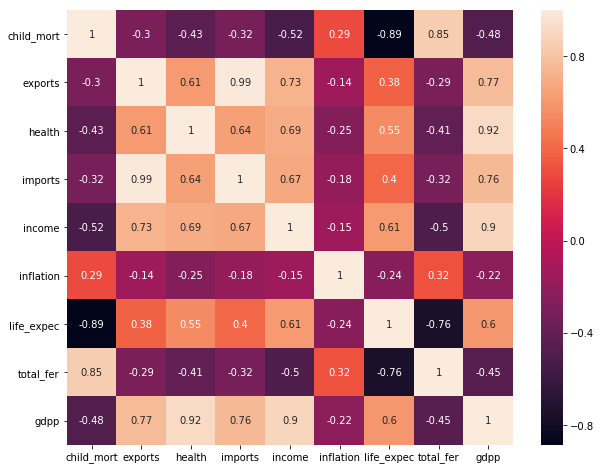

In [458]:
plt.figure(figsize = (10,8))# Size of the figure
sns.heatmap(ngo_data.corr(),annot = True)
plt.show()

From the above heatmap it can be observed that there is high positive correlation between gdpp and exports,imports,income and life expectancy.
Also there is string correlation between income and imports, exports and imports etc.

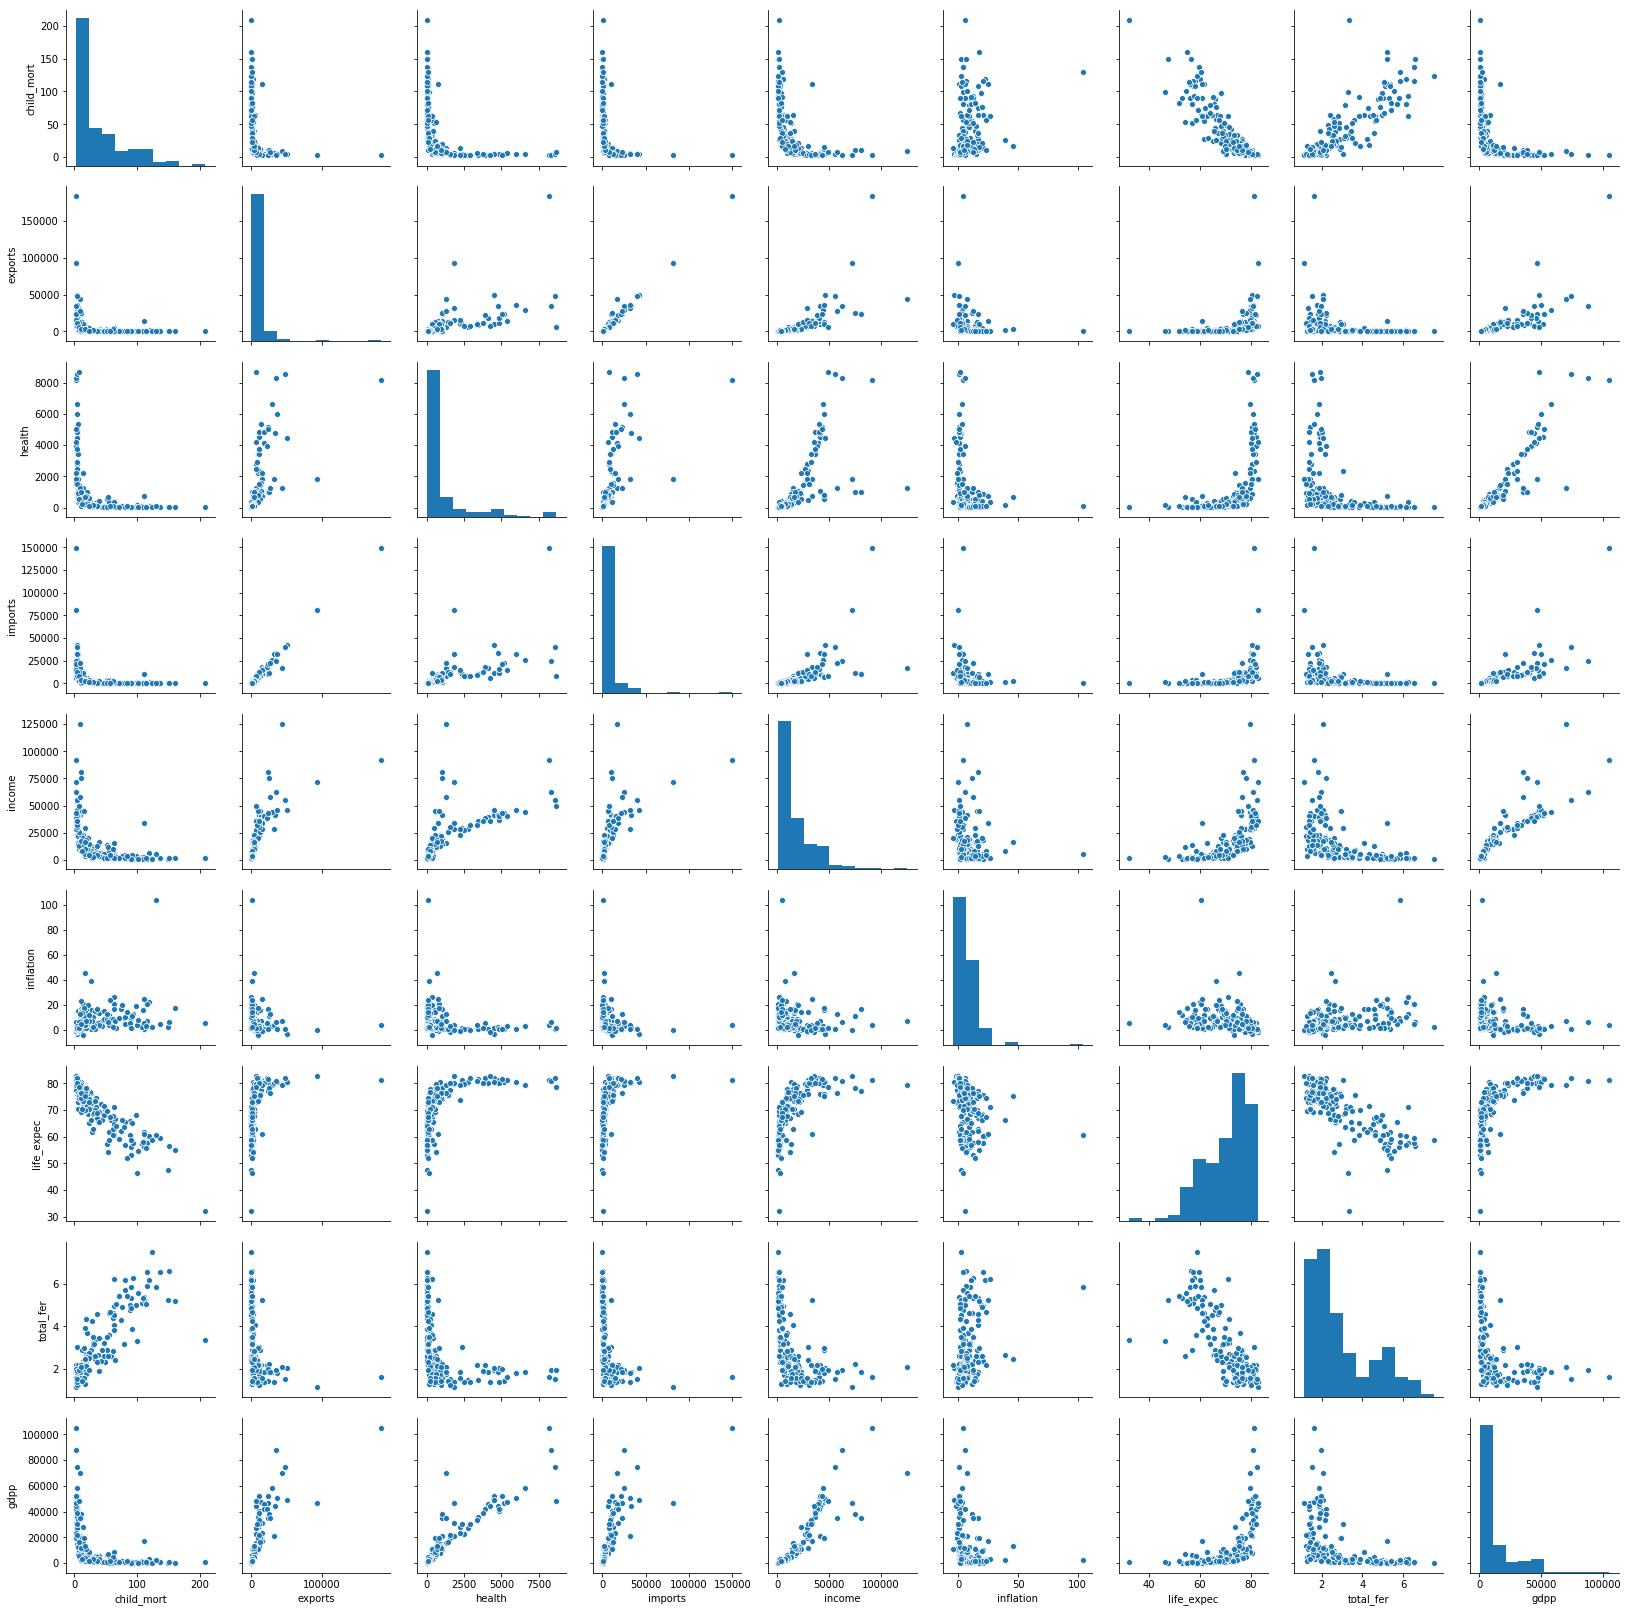

In [459]:
sns.pairplot(ngo_data)
plt.show()

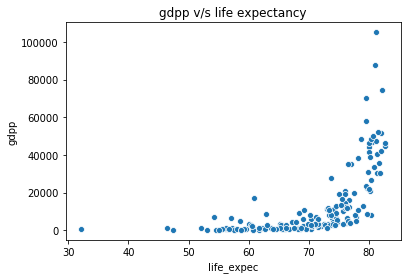

In [460]:
sns.scatterplot(data=ngo_data, x='life_expec',y='gdpp')
plt.title("gdpp v/s life expectancy")
plt.show()

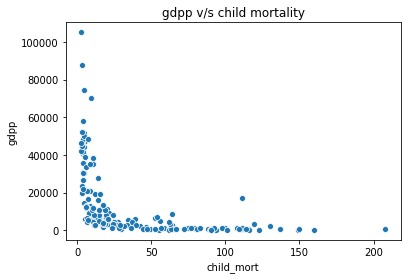

In [461]:
sns.scatterplot(data=ngo_data, x='child_mort',y='gdpp')
plt.title("gdpp v/s child mortality")
plt.show()

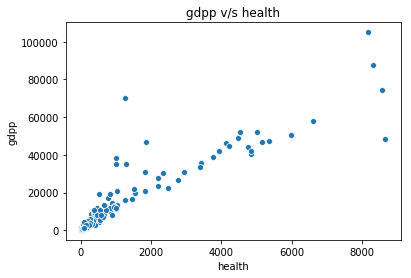

In [462]:
sns.scatterplot(data=ngo_data, x='health',y='gdpp')
plt.title("gdpp v/s health")
plt.show()

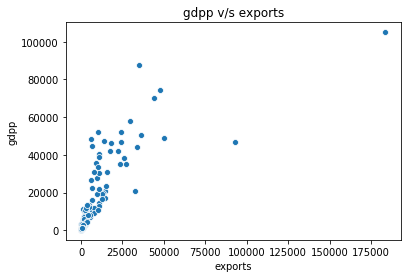

In [463]:
sns.scatterplot(data=ngo_data, x='exports',y='gdpp')
plt.title("gdpp v/s exports")
plt.show()

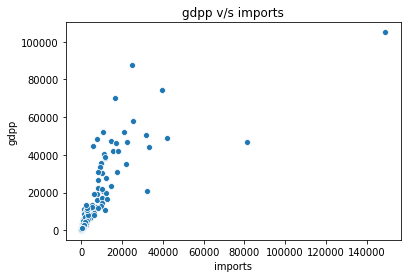

In [464]:
sns.scatterplot(data=ngo_data, x='imports',y='gdpp')
plt.title("gdpp v/s imports")
plt.show()

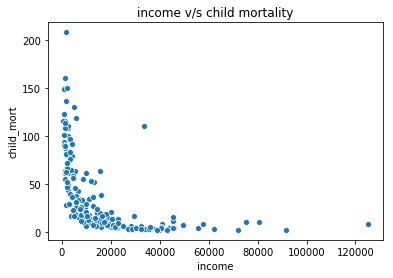

In [465]:
sns.scatterplot(data=ngo_data, x='income',y='child_mort')
plt.title("income v/s child mortality")
plt.show()

In [466]:
# Checking outliers at 25%,50%,75%,90%,95% and 99%
ngo_data.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,7420.618847,1056.733204,6588.352108,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,17973.885795,1801.408906,14710.810418,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,1.076920,12.821200,0.651092,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,447.140000,78.535500,640.215000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,1777.440000,321.886000,2045.580000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,7278.000000,976.940000,7719.600000,22800.000000,10.750000,76.800000,3.880000,14050.000000
90%,100.220000,17760.600000,3825.416000,15034.280000,41220.000000,16.640000,80.400000,5.322000,41840.000000
95%,116.000000,31385.100000,4966.701000,24241.560000,48290.000000,20.870000,81.400000,5.861000,48610.000000
99%,153.400000,64794.260000,8410.330400,55371.390000,84374.000000,41.478000,82.370000,6.563600,79088.000000


From the above data we can see that there is considerable outliers for few columns like gdpp,income,imports,exports etc. We will do the outlier removal after PCA is being performed on the dataset.

## Model Building

### PCA : 

Removing the country column so that we can proceed with PCA

In [467]:
ngo_data_pca = ngo_data.iloc[:,1:]
ngo_data_pca.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


In [468]:
ngo_data_pca.shape

(167, 9)

** Scale the data before proceeding for PCA **

In [469]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
ngo_data_pca_scaled = pd.DataFrame(scaler.fit_transform(ngo_data_pca),columns=ngo_data_pca.columns)
ngo_data_pca_scaled.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-0.411011,-0.565040,-0.432276,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.350191,-0.439218,-0.313677,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.318526,-0.484826,-0.353720,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,-0.291375,-0.532363,-0.345953,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,-0.104331,-0.178771,0.040735,0.101732,-0.601749,0.704258,-0.541946,-0.041817


In [470]:
#Improting the PCA module
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=42)

In [471]:
pca.fit(ngo_data_pca_scaled)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
  svd_solver='randomized', tol=0.0, whiten=False)

In [472]:
pca.components_

array([[-0.31639186,  0.34288671,  0.358535  ,  0.34486492,  0.38004113,
        -0.14308531,  0.34385651, -0.30284224,  0.39998795],
       [ 0.47626735,  0.39731091,  0.1550529 ,  0.37078075,  0.12838448,
         0.22126089, -0.36981973,  0.4597152 ,  0.2006241 ],
       [-0.15001225, -0.03057367, -0.07570322, -0.07217386,  0.14576421,
         0.94841868,  0.19675173, -0.07783431,  0.01033941],
       [-0.14805195,  0.44942527, -0.59971228,  0.46179779, -0.15480592,
        -0.00762798, -0.01839465, -0.21392805, -0.36477239],
       [ 0.1019948 , -0.03853829, -0.49319984, -0.2527867 ,  0.79407469,
        -0.13642345, -0.15404105, -0.02033568,  0.08750149],
       [ 0.19658519, -0.03891112,  0.18069888, -0.01217988, -0.03814681,
         0.10840284, -0.58600986, -0.75390075,  0.04538167],
       [ 0.76126725, -0.01366973, -0.06461567,  0.02718244, -0.02311312,
        -0.02207663,  0.58120846, -0.27314534, -0.04402264],
       [ 0.00644411, -0.05526371,  0.43007213,  0.1311355 ,  0

In [473]:
pca.n_components_

9

In [474]:
colnames = list(ngo_data_pca_scaled.columns)
pcs_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'Feature':colnames})
pcs_df

,PC1,PC2,Feature
0,-0.316392,0.476267,child_mort
1,0.342887,0.397311,exports
2,0.358535,0.155053,health
3,0.344865,0.370781,imports
4,0.380041,0.128384,income
5,-0.143085,0.221261,inflation
6,0.343857,-0.369820,life_expec
7,-0.302842,0.459715,total_fer
8,0.399988,0.200624,gdpp


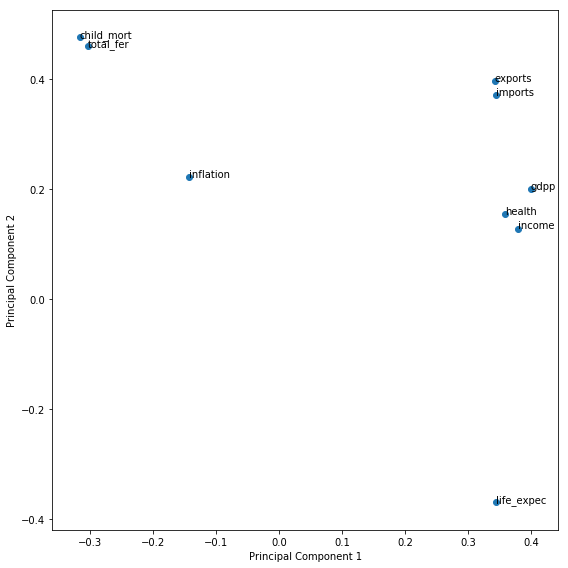

In [475]:
%matplotlib inline
fig = plt.figure(figsize = (8,8))
plt.scatter(pcs_df.PC1, pcs_df.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
for i, txt in enumerate(pcs_df.Feature):
    plt.annotate(txt, (pcs_df.PC1[i],pcs_df.PC2[i]))
plt.tight_layout()
plt.show()

We can see that majority of the features like gdpp,income,exports,health are high for principal component 1

** Looking at the screeplot to assess the number of needed principal components **

In [476]:
pca.explained_variance_ratio_

array([  5.89372984e-01,   1.84451685e-01,   9.91147170e-02,
         6.07227801e-02,   3.02917253e-02,   2.45982702e-02,
         9.39743701e-03,   1.55641971e-03,   4.93981394e-04])

In [477]:
np.cumsum(pca.explained_variance_ratio_)

array([ 0.58937298,  0.77382467,  0.87293939,  0.93366217,  0.96395389,
        0.98855216,  0.9979496 ,  0.99950602,  1.        ])

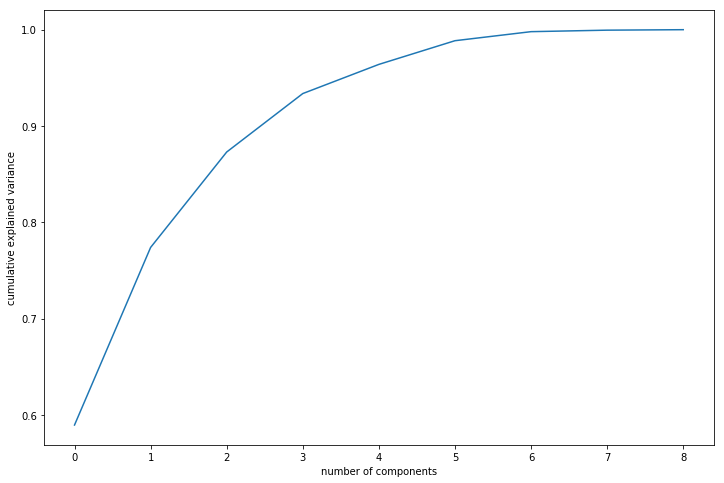

In [478]:
#Making the screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

** Looks like 4 components are enough to describe 93% of the variance in the dataset **
- We'll choose 4 components for our modeling

In [479]:
# Since the dataset is not large here we don't need to perform incremental PCA
pca = PCA(n_components=4)

In [480]:
df_pca = pca.fit_transform(ngo_data_pca_scaled)
df_pca.shape

(167, 4)

** Creating correlation matrix for the principal components - we expect little to no correlation **

In [481]:
#creating correlation matrix for the principal components
corrmat = np.corrcoef(df_pca.transpose())

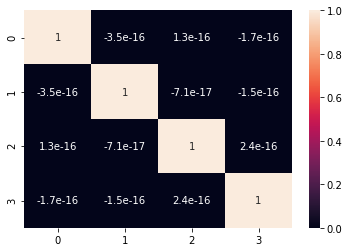

In [482]:
#plotting the correlation matrix
%matplotlib inline
sns.heatmap(corrmat,annot = True)
plt.show()

In [483]:
# 1s -> 0s in diagonals
corrmat_nodiag = corrmat - np.diagflat(corrmat.diagonal())
print("max corr:",corrmat_nodiag.max(), ", min corr: ", corrmat_nodiag.min(),)
# we see that correlations are indeed very close to 0

max corr: 2.39538187487e-16 , min corr:  -3.46781981613e-16


** There is indeed no correlation between the principal components.**
- We effectively have removed multicollinearity from our situation, and our models will be much more stable

In [484]:
df_pca2 = pd.DataFrame(df_pca,columns=['PC1','PC2','PC3','PC4'])
df_pca2.head()

,PC1,PC2,PC3,PC4
0,-2.635575,1.472267,-0.549489,-0.242326
1,-0.024206,-1.429892,-0.014123,0.450645
2,-0.459557,-0.675495,0.959355,0.218456
3,-2.722630,2.172332,0.600215,-0.433978
4,0.648597,-1.023437,-0.257430,0.289201


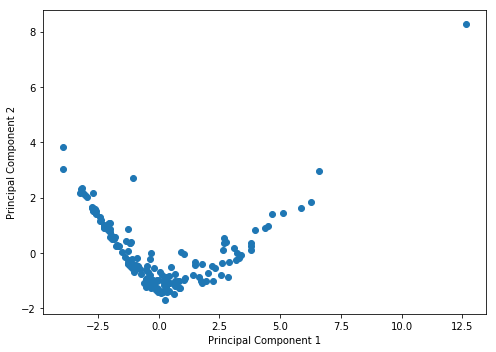

In [485]:
%matplotlib inline
fig = plt.figure(figsize = (7,5))
plt.scatter(df_pca2.PC1, df_pca2.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.tight_layout()
plt.show()

** Outlier removal on the PCA dataset **

In [486]:
df_pca2.shape

(167, 4)

In [487]:
df_pca2.describe()

,PC1,PC2,PC3,PC4
count,1.670000e+02,1.670000e+02,1.670000e+02,1.670000e+02
mean,-2.659217e-17,-5.451394e-17,3.822624e-17,3.024859e-17
std,2.310046e+00,1.292310e+00,9.473152e-01,7.414831e-01
min,-3.937287e+00,-1.694220e+00,-1.756335e+00,-3.263264e+00
25%,-1.447294e+00,-9.750541e-01,-4.010482e-01,-2.345881e-01
50%,-3.574241e-01,-4.017902e-01,-1.744060e-01,1.287529e-01
75%,8.494139e-01,6.800428e-01,2.557727e-01,3.461697e-01
max,1.264807e+01,8.276683e+00,7.928939e+00,4.398488e+00


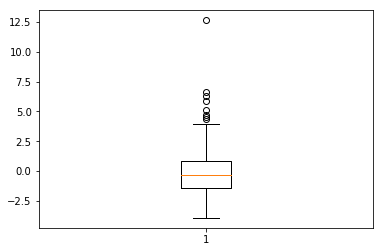

In [488]:
plt.boxplot(df_pca2.PC1)
Q1 = df_pca2.PC1.quantile(0.25)
Q3 = df_pca2.PC1.quantile(0.75)
IQR = Q3 - Q1
df_pca2 = df_pca2[(df_pca2.PC1 >= Q1 - 1.5*IQR) & (df_pca2.PC1 <= Q3 + 1.5*IQR)]

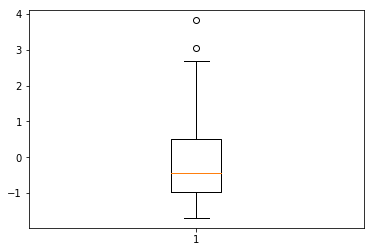

In [489]:
plt.boxplot(df_pca2.PC2)
Q1 = df_pca2.PC2.quantile(0.25)
Q3 = df_pca2.PC2.quantile(0.75)
IQR = Q3 - Q1
df_pca2 = df_pca2[(df_pca2.PC2 >= Q1 - 1.5*IQR) & (df_pca2.PC2 <= Q3 + 1.5*IQR)]

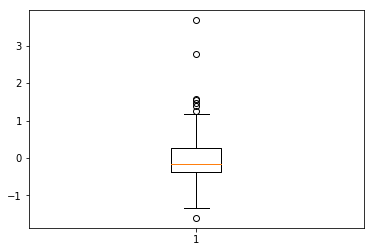

In [490]:
plt.boxplot(df_pca2.PC3)
Q1 = df_pca2.PC3.quantile(0.25)
Q3 = df_pca2.PC3.quantile(0.75)
IQR = Q3 - Q1
df_pca2 = df_pca2[(df_pca2.PC3 >= Q1 - 1.5*IQR) & (df_pca2.PC3 <= Q3 + 1.5*IQR)]

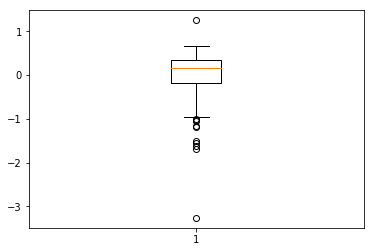

In [491]:
plt.boxplot(df_pca2.PC4)
Q1 = df_pca2.PC4.quantile(0.25)
Q3 = df_pca2.PC4.quantile(0.75)
IQR = Q3 - Q1
df_pca2 = df_pca2[(df_pca2.PC4 >= Q1 - 1.5*IQR) & (df_pca2.PC4 <= Q3 + 1.5*IQR)]

In [492]:
df_pca2.describe()

,PC1,PC2,PC3,PC4
count,138.000000,138.000000,138.000000,138.000000
mean,-0.535456,-0.196046,-0.105571,0.102393
std,1.504155,1.047260,0.566383,0.331094
min,-3.223706,-1.694220,-1.325128,-0.950198
25%,-1.719397,-1.017802,-0.414019,-0.107178
50%,-0.518116,-0.536876,-0.174545,0.182203
75%,0.323032,0.527380,0.245147,0.363359
max,3.961652,2.692334,1.180851,0.675938


In [493]:
df_pca2.shape

(138, 4)

In [494]:
#Percentage of rows lost due to outlier removal
100 - (df_pca2.shape[0]/ngo_data.shape[0] * 100)

17.365269461077844

### Clustering :

### KMeans Clustering:

In [495]:
from sklearn.cluster import KMeans
help(KMeans)

Help on class KMeans in module sklearn.cluster.k_means_:

class KMeans(sklearn.base.BaseEstimator, sklearn.base.ClusterMixin, sklearn.base.TransformerMixin)
 |  K-Means clustering
 |  
 |  Read more in the :ref:`User Guide <k_means>`.
 |  
 |  Parameters
 |  ----------
 |  
 |  n_clusters : int, optional, default: 8
 |      The number of clusters to form as well as the number of
 |      centroids to generate.
 |  
 |  init : {'k-means++', 'random' or an ndarray}
 |      Method for initialization, defaults to 'k-means++':
 |  
 |      'k-means++' : selects initial cluster centers for k-mean
 |      clustering in a smart way to speed up convergence. See section
 |      Notes in k_init for more details.
 |  
 |      'random': choose k observations (rows) at random from data for
 |      the initial centroids.
 |  
 |      If an ndarray is passed, it should be of shape (n_clusters, n_features)
 |      and gives the initial centers.
 |  
 |  n_init : int, default: 10
 |      Number of time t

** Check the Hopkins Statistics of our dataset **

The Hopkins statistic, is a statistic which gives a value which indicates the cluster tendency, in other words: how well the data can be clustered.

- If the value is between {0.01, ...,0.3}, the data is regularly spaced.

- If the value is around 0.5, it is random.

- If the value is between {0.7, ..., 0.99}, it has a high tendency to cluster.

In [496]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [497]:
hopkins(df_pca2)

0.84316423361625592

Since the Hopkins statistics score is more than 0.7, it can be interpreted that clustering can be performed on this dataset.

** Let's determine the optimal number of clusters using Silhouette Analysis and Sum of Squared Distance **

In [498]:
from sklearn.metrics import silhouette_score

# Silhouette Analysis
sse_ = []
for k in range(2, 15):
    kmeans = KMeans(n_clusters=k).fit(df_pca2)
    sse_.append([k, silhouette_score(df_pca2, kmeans.labels_)])

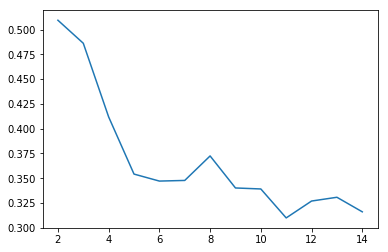

In [499]:
plt.plot(pd.DataFrame(sse_)[0], pd.DataFrame(sse_)[1])

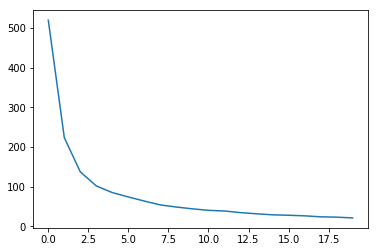

In [500]:
# sum of squared distances
ssd = []
for num_clusters in list(range(1,21)):
    model_clus = KMeans(n_clusters = num_clusters, max_iter=50)
    model_clus.fit(df_pca2)
    ssd.append(model_clus.inertia_)

plt.plot(ssd)

From the above silhoutte and elbow plot, let's first proceed with the number of clusters(k) as 4.

### K = 4

In [501]:
df_pca2.shape

(138, 4)

In [502]:
# Kmeans with K=4
model_clus4 = KMeans(n_clusters = 4, max_iter=50,random_state=100)
model_clus4.fit(df_pca2)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=100, tol=0.0001, verbose=0)

In [503]:
model_clus4.labels_

array([3, 2, 2, 3, 2, 2, 2, 0, 0, 1, 2, 2, 0, 2, 3, 2, 1, 2, 1, 2, 2, 3, 3,
       1, 3, 2, 3, 2, 2, 2, 1, 3, 3, 2, 3, 2, 0, 0, 2, 2, 1, 2, 3, 1, 2, 1,
       1, 3, 2, 1, 0, 2, 1, 3, 3, 1, 2, 0, 1, 1, 2, 1, 0, 0, 2, 2, 2, 1, 1,
       0, 1, 1, 2, 2, 3, 3, 2, 2, 2, 1, 3, 2, 2, 3, 3, 2, 1, 2, 2, 2, 3, 1,
       1, 1, 0, 3, 0, 1, 2, 2, 2, 1, 2, 0, 2, 2, 1, 1, 1, 2, 2, 3, 0, 0, 1,
       1, 0, 0, 2, 1, 2, 1, 3, 2, 3, 1, 2, 2, 1, 3, 2, 0, 2, 1, 1, 2, 1, 3])

In [504]:
model_clus4.labels_.shape

(138,)

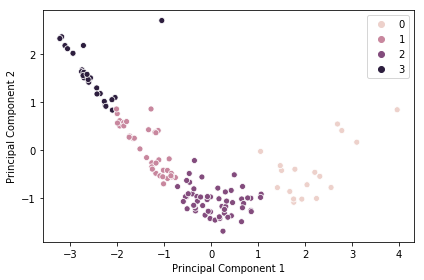

In [505]:
ax = sns.scatterplot(df_pca2['PC1'], df_pca2['PC2'], hue=model_clus4.labels_)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.tight_layout()

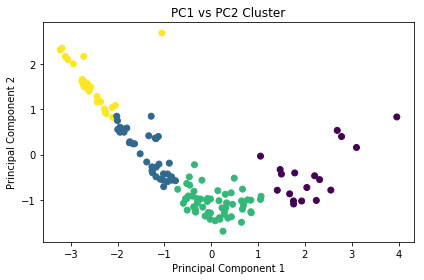

In [506]:
plt.scatter(df_pca2['PC1'], df_pca2['PC2'],c=model_clus4.labels_)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title("PC1 vs PC2 Cluster")
plt.tight_layout()
plt.show()

In [507]:
df_test = df_pca2.copy()
df_test.head(5)

,PC1,PC2,PC3,PC4
0,-2.635575,1.472267,-0.549489,-0.242326
1,-0.024206,-1.429892,-0.014123,0.450645
2,-0.459557,-0.675495,0.959355,0.218456
3,-2.722630,2.172332,0.600215,-0.433978
4,0.648597,-1.023437,-0.257430,0.289201


In [508]:
df_test = df_test.reset_index(drop=True)

In [509]:
df_test_cluster = pd.concat([df_test, pd.Series(model_clus4.labels_,dtype=int)],axis=1)
orig_col = df_test.columns.tolist()
orig_col.append('ClusterID')
df_test_cluster.columns = orig_col
df_test_cluster.head(10)

,PC1,PC2,PC3,PC4,ClusterID
0,-2.635575,1.472267,-0.549489,-0.242326,3
1,-0.024206,-1.429892,-0.014123,0.450645,2
2,-0.459557,-0.675495,0.959355,0.218456,2
3,-2.722630,2.172332,0.600215,-0.433978,3
4,0.648597,-1.023437,-0.257430,0.289201,2
5,-0.334555,-1.271889,0.190564,0.500247,2
6,-0.467995,-0.492682,0.609900,0.254612,2
7,1.498962,-0.429632,-0.544543,-0.250327,0
8,1.470888,-0.328925,0.397298,0.170862,0
9,-1.015167,-0.708743,-0.101817,0.368131,1


** Calculating mean PCA for each cluster **

In [510]:
km_clusters_pc1 = pd.DataFrame(df_test_cluster.groupby(["ClusterID"]).PC1.mean())
km_clusters_pc2 = pd.DataFrame(df_test_cluster.groupby(["ClusterID"]).PC2.mean())
km_clusters_pc3 = pd.DataFrame(df_test_cluster.groupby(["ClusterID"]).PC3.mean())
km_clusters_pc4 = pd.DataFrame(df_test_cluster.groupby(["ClusterID"]).PC4.mean())

In [511]:
df = pd.concat([pd.Series([0,1,2,3]), km_clusters_pc1, km_clusters_pc2, km_clusters_pc3,km_clusters_pc4], axis=1)
df.columns = ["ClusterID", "PC1_mean", "PC2_mean", "PC3_mean","PC4_mean"]
df

,ClusterID,PC1_mean,PC2_mean,PC3_mean,PC4_mean
0,0,2.123572,-0.422559,0.043955,-0.223509
1,1,-1.326986,-0.012854,-0.151375,0.153868
2,2,0.082870,-1.063954,0.053754,0.343528
3,3,-2.551250,1.562366,-0.485307,-0.266584


** Merge the pca dataset with the original dataset for analysis **

In [512]:
df_pca_country = pd.merge(ngo_data,df_pca2,left_index=True, right_index=True)
df_pca_country.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,PC1,PC2,PC3,PC4
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,-2.635575,1.472267,-0.549489,-0.242326
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,-0.024206,-1.429892,-0.014123,0.450645
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,-0.459557,-0.675495,0.959355,0.218456
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530,-2.722630,2.172332,0.600215,-0.433978
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,0.648597,-1.023437,-0.257430,0.289201


In [513]:
df_pca_country.shape

(138, 14)

In [514]:
df_pca_country.index

Int64Index([  0,   1,   2,   3,   4,   6,   9,  10,  11,  12,
            ...
            154, 155, 156, 157, 160, 161, 162, 164, 165, 166],
           dtype='int64', length=138)

In [515]:
df_pca_country = df_pca_country.reset_index(drop=True)
df_pca_country.index

RangeIndex(start=0, stop=138, step=1)

** Merge the clusterid obtained from PCA with the original dataset **

In [516]:
df_pca_cluster_country = pd.concat([df_pca_country, pd.Series(model_clus4.labels_,dtype=int)],axis=1)
orig_col = df_pca_country.columns.tolist()
orig_col.append('ClusterID')
df_pca_cluster_country.columns = orig_col
df_pca_cluster_country.head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,PC1,PC2,PC3,PC4,ClusterID
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.440,56.2,5.82,553,-2.635575,1.472267,-0.549489,-0.242326,3
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.490,76.3,1.65,4090,-0.024206,-1.429892,-0.014123,0.450645,2
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.100,76.5,2.89,4460,-0.459557,-0.675495,0.959355,0.218456,2
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.400,60.1,6.16,3530,-2.722630,2.172332,0.600215,-0.433978,3
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.440,76.8,2.13,12200,0.648597,-1.023437,-0.257430,0.289201,2
5,Armenia,18.1,669.76,141.6800,1458.660,6700,7.770,73.3,1.69,3220,-0.334555,-1.271889,0.190564,0.500247,2
6,Azerbaijan,39.2,3171.12,343.3920,1208.880,16000,13.800,69.1,1.92,5840,-0.467995,-0.492682,0.609900,0.254612,2
7,Bahamas,13.8,9800.00,2209.2000,12236.000,22900,-0.393,73.8,1.86,28000,1.498962,-0.429632,-0.544543,-0.250327,0
8,Bahrain,8.6,14386.50,1028.7900,10536.300,41100,7.440,76.0,2.16,20700,1.470888,-0.328925,0.397298,0.170862,0
9,Bangladesh,49.4,121.28,26.6816,165.244,2440,7.140,70.4,2.33,758,-1.015167,-0.708743,-0.101817,0.368131,1


In [517]:
df_pca_cluster_country.shape

(138, 15)

In [518]:
# Check for number of countries under each cluster
df_pca_cluster_country.groupby('ClusterID')['country'].count()

ClusterID
0    18
1    38
2    56
3    26
Name: country, dtype: int64

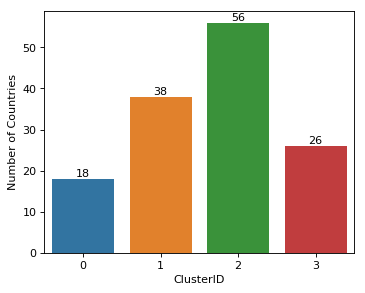

In [519]:
plt.figure(figsize=(5,4),dpi=80)
ax = sns.countplot(data=df_pca_cluster_country,x='ClusterID')
create_label(ax,'integer')
ax.set_ylabel("Number of Countries")
plt.show()

In [520]:
km_clusters_childmort = pd.DataFrame(df_pca_cluster_country.groupby(["ClusterID"]).child_mort.mean())
km_clusters_exports = pd.DataFrame(df_pca_cluster_country.groupby(["ClusterID"]).exports.mean())
km_clusters_health = pd.DataFrame(df_pca_cluster_country.groupby(["ClusterID"]).health.mean())
km_clusters_imports = pd.DataFrame(df_pca_cluster_country.groupby(["ClusterID"]).imports.mean())
km_clusters_income = pd.DataFrame(df_pca_cluster_country.groupby(["ClusterID"]).income.mean())
km_clusters_inflation = pd.DataFrame(df_pca_cluster_country.groupby(["ClusterID"]).inflation.mean())
km_clusters_life_expec = pd.DataFrame(df_pca_cluster_country.groupby(["ClusterID"]).life_expec.mean())
km_clusters_total_fer = pd.DataFrame(df_pca_cluster_country.groupby(["ClusterID"]).total_fer.mean())
km_clusters_gdpp = pd.DataFrame(df_pca_cluster_country.groupby(["ClusterID"]).gdpp.mean())

In [521]:
df = pd.concat([pd.Series([0,1,2,3]), km_clusters_childmort, km_clusters_exports, km_clusters_health,km_clusters_imports,\
               km_clusters_income,km_clusters_inflation,km_clusters_life_expec,km_clusters_total_fer,km_clusters_gdpp], axis=1)
df.columns = ["ClusterID", "child_mort_mean", "exports_mean", "health_mean","imports_mean",\
             "income_mean","inflation_mean","life_expec_mean","total_fer_mean","gdpp_mean"]
df

,ClusterID,child_mort_mean,exports_mean,health_mean,imports_mean,income_mean,inflation_mean,life_expec_mean,total_fer_mean,gdpp_mean
0,0,6.016667,14646.661111,2259.547778,13230.394444,36388.888889,3.568333,78.955556,1.840000,28927.777778
1,1,50.481579,880.094219,141.126345,1018.011897,5126.315789,8.396842,65.602632,3.554211,2352.789474
2,2,16.355357,3264.368214,478.629804,3500.688036,13692.678571,5.758018,74.507143,1.993571,7207.678571
3,3,104.507692,923.082046,76.155192,779.279462,3189.038462,10.104038,57.880769,5.557692,1510.769231


** Socio-economic analysis based on clusters **

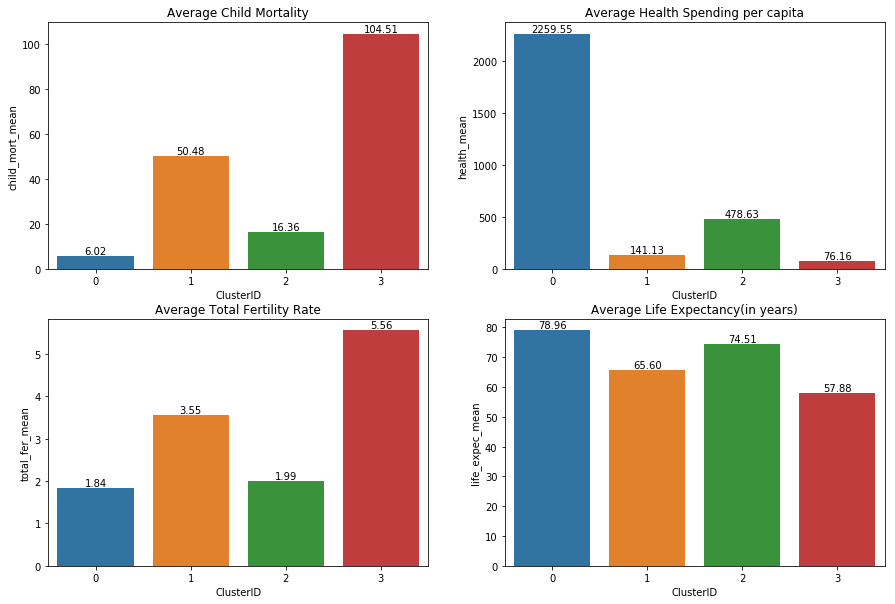

In [522]:
# Let's plot the social factors based on cluster-ids
plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 1)
ax = sns.barplot(x=df.ClusterID, y=df.child_mort_mean)
ax.set_title('Average Child Mortality')
create_label(ax,'float')

plt.subplot(2, 2, 2)
ax = sns.barplot(x=df.ClusterID, y=df.health_mean)
ax.set_title('Average Health Spending per capita')
create_label(ax,'float')

plt.subplot(2, 2, 3)
ax = sns.barplot(x=df.ClusterID, y=df.total_fer_mean)
ax.set_title('Average Total Fertility Rate')
create_label(ax,'float')

plt.subplot(2, 2, 4)
ax = sns.barplot(x=df.ClusterID, y=df.life_expec_mean)
ax.set_title('Average Life Expectancy(in years)')
create_label(ax,'float')
plt.show()

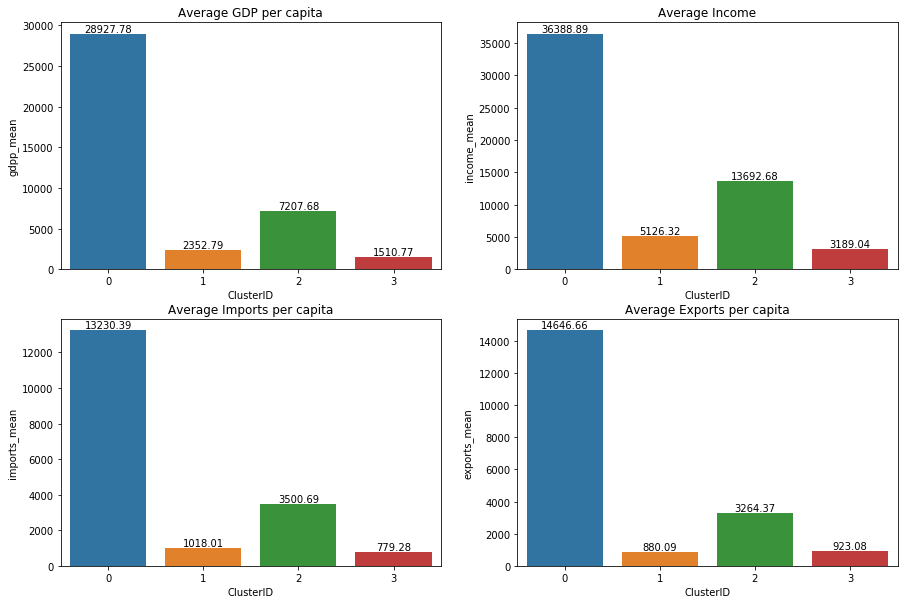

In [523]:
# Let's plot the economic factors based on cluster-ids
plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 1)
ax = sns.barplot(x=df.ClusterID, y=df.gdpp_mean)
ax.set_title('Average GDP per capita')
create_label(ax,'float')

plt.subplot(2, 2, 2)
ax = sns.barplot(x=df.ClusterID, y=df.income_mean)
ax.set_title('Average Income')
create_label(ax,'float')

plt.subplot(2, 2, 3)
ax = sns.barplot(x=df.ClusterID, y=df.imports_mean)
ax.set_title('Average Imports per capita')
create_label(ax,'float')

plt.subplot(2, 2, 4)
ax = sns.barplot(x=df.ClusterID, y=df.exports_mean)
ax.set_title('Average Exports per capita')
create_label(ax,'float')
plt.show()

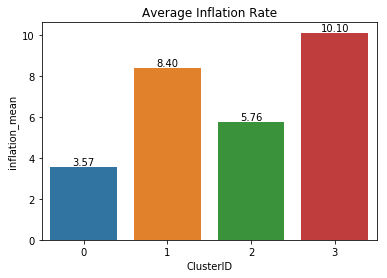

In [524]:
ax = sns.barplot(x=df.ClusterID, y=df.inflation_mean)
ax.set_title('Average Inflation Rate')
create_label(ax,'float')
plt.show()

### Cluster fitting the criteria of funding : 

From the above plots following observations can be made :

- Clusters 1 and 3 are the most affected clusters in terms of mean gdpp and income. Also the child mortality rate and inflation rate is considerably high. Total health spending is also less for those clusters.

- Total fertility rate is quite high for clusters 1 and 3 which means that the rate of population increase is high for the countries falling under those clusters.Combining this with the low income and gdpp means these clusters are in dire need of support and aid.

- Cluster 0 is the most well performing cluster with high gdpp,income, health spendings, life-expectancy and low child mortality and inflation rate.

- Cluster 2 has also average gdpp and income. They might not be the most developed countries but they don't need immediate attention for aid.

** So it can be clearly seen from the analysis that the countries falling under Cluster-1 and Cluster-3, especially countries that fall under Cluster-3 are the worstly affected countries and are in dire need of aid and support **

Let's look at the countries that are falling under these clusters.

In [525]:
# Countries falling under cluster-3
pd.DataFrame(df_pca_cluster_country[df_pca_cluster_country.ClusterID==3]['country'])

,country
0,Afghanistan
3,Angola
14,Benin
21,Burkina Faso
22,Burundi
24,Cameroon
26,Chad
31,"Congo, Dem. Rep."
32,"Congo, Rep."
34,Cote d'Ivoire


In [526]:
# Countries falling under cluster-1
pd.DataFrame(df_pca_cluster_country[df_pca_cluster_country.ClusterID==1]['country']).head(10)

,country
9,Bangladesh
16,Bolivia
18,Botswana
23,Cambodia
30,Comoros
40,Egypt
43,Eritrea
45,Fiji
46,Gabon
49,Ghana


These countries are mostly 3rd world countries with high poverty rate.

** According to Wikipedia <https://en.wikipedia.org/wiki/Poverty_in_Afghanistan>: **
Afghanistan is one amongst the poorest countries in the world. In Afghanistan, poverty is widespread in rural and urban areas.

NGO Help should come forward and provide funding to these countries.

In [527]:
# Check for countries falling under cluster-0
pd.DataFrame(df_pca_cluster_country[df_pca_cluster_country.ClusterID==0]['country']).head(10)

,country
7,Bahamas
8,Bahrain
12,Belgium
36,Cyprus
37,Czech Republic
50,Greece
57,Iceland
62,Israel
63,Italy
69,Kuwait


These countries have high gdpp and income as well as low child mortality. These are developed countries and doesn't needs any attention from NGO.

### K=5

Let's revisit the clusters , this time by taking number of clusters as 5.

In [528]:
df_pca2.shape

(138, 4)

In [529]:
# Kmeans with K=5
model_clus5 = KMeans(n_clusters = 5, max_iter=50,random_state=100)
model_clus5.fit(df_pca2)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=100, tol=0.0001, verbose=0)

In [530]:
model_clus5.labels_

array([1, 0, 2, 1, 0, 0, 2, 3, 3, 2, 0, 0, 3, 2, 1, 2, 2, 0, 4, 0, 0, 1, 1,
       2, 1, 2, 1, 0, 0, 0, 4, 1, 4, 0, 1, 0, 3, 3, 2, 0, 2, 0, 4, 4, 0, 2,
       4, 4, 0, 4, 3, 0, 2, 1, 1, 2, 0, 3, 2, 2, 0, 4, 3, 3, 0, 2, 2, 4, 4,
       3, 2, 4, 0, 0, 1, 1, 0, 0, 0, 4, 1, 0, 0, 1, 4, 0, 2, 2, 0, 2, 1, 2,
       4, 2, 3, 1, 3, 4, 0, 2, 0, 2, 0, 3, 0, 0, 4, 2, 4, 0, 0, 1, 3, 3, 4,
       4, 3, 3, 0, 4, 2, 2, 1, 0, 1, 2, 0, 0, 2, 1, 0, 3, 0, 2, 2, 2, 4, 1])

In [531]:
model_clus5.labels_.shape

(138,)

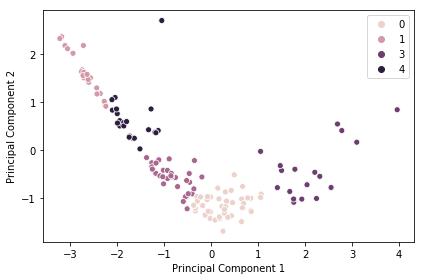

In [532]:
ax = sns.scatterplot(df_pca2['PC1'], df_pca2['PC2'], hue=model_clus5.labels_)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.tight_layout()

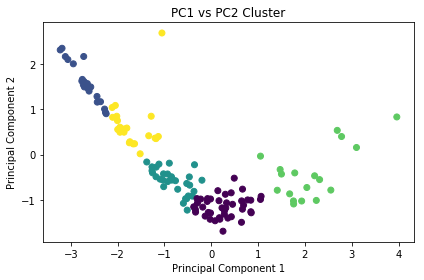

In [533]:
plt.scatter(df_pca2['PC1'], df_pca2['PC2'],c=model_clus5.labels_)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title("PC1 vs PC2 Cluster")
plt.tight_layout()

** Merge the pca dataset with the original dataset **

In [534]:
df_pca_country_1 = pd.merge(ngo_data,df_pca2,left_index=True, right_index=True)
df_pca_country_1.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,PC1,PC2,PC3,PC4
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,-2.635575,1.472267,-0.549489,-0.242326
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,-0.024206,-1.429892,-0.014123,0.450645
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,-0.459557,-0.675495,0.959355,0.218456
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530,-2.722630,2.172332,0.600215,-0.433978
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,0.648597,-1.023437,-0.257430,0.289201


In [535]:
df_pca_country_1.shape

(138, 14)

In [536]:
df_pca_country_1.index

Int64Index([  0,   1,   2,   3,   4,   6,   9,  10,  11,  12,
            ...
            154, 155, 156, 157, 160, 161, 162, 164, 165, 166],
           dtype='int64', length=138)

In [537]:
df_pca_country_1 = df_pca_country.reset_index(drop=True)
df_pca_country_1.index

RangeIndex(start=0, stop=138, step=1)

** Merge the clusterid with the original dataset **

In [538]:
df_pca_cluster_country_1 = pd.concat([df_pca_country_1, pd.Series(model_clus5.labels_,dtype=int)],axis=1)
orig_col = df_pca_country_1.columns.tolist()
orig_col.append('ClusterID')
df_pca_cluster_country_1.columns = orig_col
df_pca_cluster_country_1.head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,PC1,PC2,PC3,PC4,ClusterID
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.440,56.2,5.82,553,-2.635575,1.472267,-0.549489,-0.242326,1
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.490,76.3,1.65,4090,-0.024206,-1.429892,-0.014123,0.450645,0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.100,76.5,2.89,4460,-0.459557,-0.675495,0.959355,0.218456,2
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.400,60.1,6.16,3530,-2.722630,2.172332,0.600215,-0.433978,1
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.440,76.8,2.13,12200,0.648597,-1.023437,-0.257430,0.289201,0
5,Armenia,18.1,669.76,141.6800,1458.660,6700,7.770,73.3,1.69,3220,-0.334555,-1.271889,0.190564,0.500247,0
6,Azerbaijan,39.2,3171.12,343.3920,1208.880,16000,13.800,69.1,1.92,5840,-0.467995,-0.492682,0.609900,0.254612,2
7,Bahamas,13.8,9800.00,2209.2000,12236.000,22900,-0.393,73.8,1.86,28000,1.498962,-0.429632,-0.544543,-0.250327,3
8,Bahrain,8.6,14386.50,1028.7900,10536.300,41100,7.440,76.0,2.16,20700,1.470888,-0.328925,0.397298,0.170862,3
9,Bangladesh,49.4,121.28,26.6816,165.244,2440,7.140,70.4,2.33,758,-1.015167,-0.708743,-0.101817,0.368131,2


In [539]:
df_pca_cluster_country_1.shape

(138, 15)

In [540]:
# Check for number of countries under each cluster
df_pca_cluster_country_1.groupby('ClusterID')['country'].count()

ClusterID
0    43
1    22
2    33
3    18
4    22
Name: country, dtype: int64

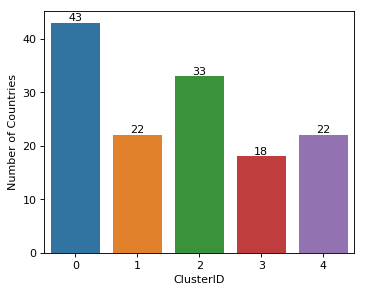

In [541]:
plt.figure(figsize=(5,4),dpi=80)
ax = sns.countplot(data=df_pca_cluster_country_1,x='ClusterID')
create_label(ax,'integer')
ax.set_ylabel("Number of Countries")
plt.show()

In [542]:
km_clusters_childmort = pd.DataFrame(df_pca_cluster_country_1.groupby(["ClusterID"]).child_mort.mean())
km_clusters_exports = pd.DataFrame(df_pca_cluster_country_1.groupby(["ClusterID"]).exports.mean())
km_clusters_health = pd.DataFrame(df_pca_cluster_country_1.groupby(["ClusterID"]).health.mean())
km_clusters_imports = pd.DataFrame(df_pca_cluster_country_1.groupby(["ClusterID"]).imports.mean())
km_clusters_income = pd.DataFrame(df_pca_cluster_country_1.groupby(["ClusterID"]).income.mean())
km_clusters_inflation = pd.DataFrame(df_pca_cluster_country_1.groupby(["ClusterID"]).inflation.mean())
km_clusters_life_expec = pd.DataFrame(df_pca_cluster_country_1.groupby(["ClusterID"]).life_expec.mean())
km_clusters_total_fer = pd.DataFrame(df_pca_cluster_country_1.groupby(["ClusterID"]).total_fer.mean())
km_clusters_gdpp = pd.DataFrame(df_pca_cluster_country_1.groupby(["ClusterID"]).gdpp.mean())

In [543]:
df = pd.concat([pd.Series([0,1,2,3,4]), km_clusters_childmort, km_clusters_exports, km_clusters_health,km_clusters_imports,\
               km_clusters_income,km_clusters_inflation,km_clusters_life_expec,km_clusters_total_fer,km_clusters_gdpp], axis=1)
df.columns = ["ClusterID", "child_mort_mean", "exports_mean", "health_mean","imports_mean",\
             "income_mean","inflation_mean","life_expec_mean","total_fer_mean","gdpp_mean"]
df

,ClusterID,child_mort_mean,exports_mean,health_mean,imports_mean,income_mean,inflation_mean,life_expec_mean,total_fer_mean,gdpp_mean
0,0,13.074419,3668.184419,548.293163,3997.283023,14901.395349,4.978326,75.146512,1.840930,8093.023256
1,1,107.481818,284.292600,48.256964,350.736909,1774.772727,8.813864,56.813636,5.620455,803.545455
2,2,34.590909,1246.786622,168.727285,1374.437003,6850.303030,7.769424,69.896970,2.819091,3021.575758
3,3,6.016667,14646.661111,2259.547778,13230.394444,36388.888889,3.568333,78.955556,1.840000,28927.777778
4,4,67.413636,1596.273082,179.083886,1364.929318,6301.818182,10.903182,62.836364,4.334545,3042.090909


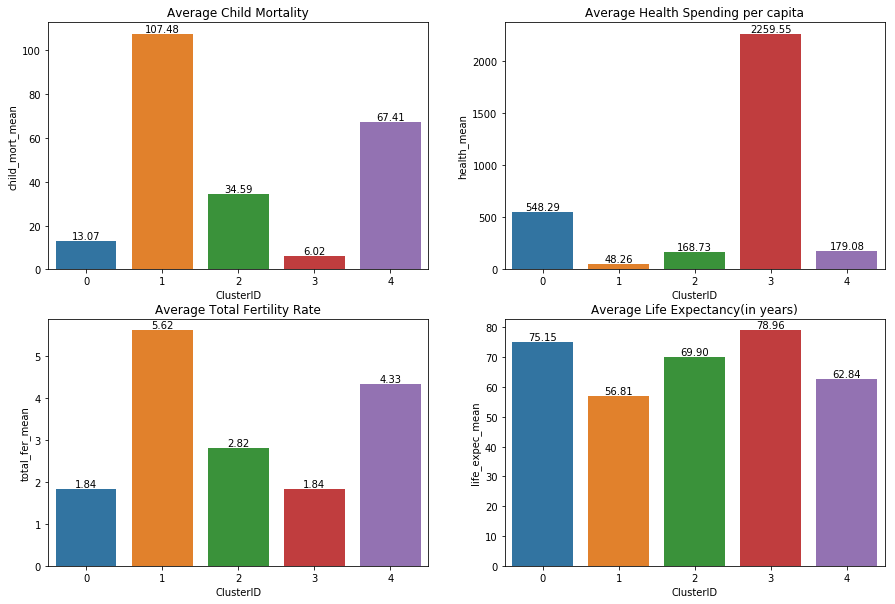

In [544]:
# Let's plot the social factors based on cluster-ids
plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 1)
ax = sns.barplot(x=df.ClusterID, y=df.child_mort_mean)
ax.set_title('Average Child Mortality')
create_label(ax,'float')

plt.subplot(2, 2, 2)
ax = sns.barplot(x=df.ClusterID, y=df.health_mean)
ax.set_title('Average Health Spending per capita')
create_label(ax,'float')

plt.subplot(2, 2, 3)
ax = sns.barplot(x=df.ClusterID, y=df.total_fer_mean)
ax.set_title('Average Total Fertility Rate')
create_label(ax,'float')

plt.subplot(2, 2, 4)
ax = sns.barplot(x=df.ClusterID, y=df.life_expec_mean)
ax.set_title('Average Life Expectancy(in years)')
create_label(ax,'float')

plt.show()

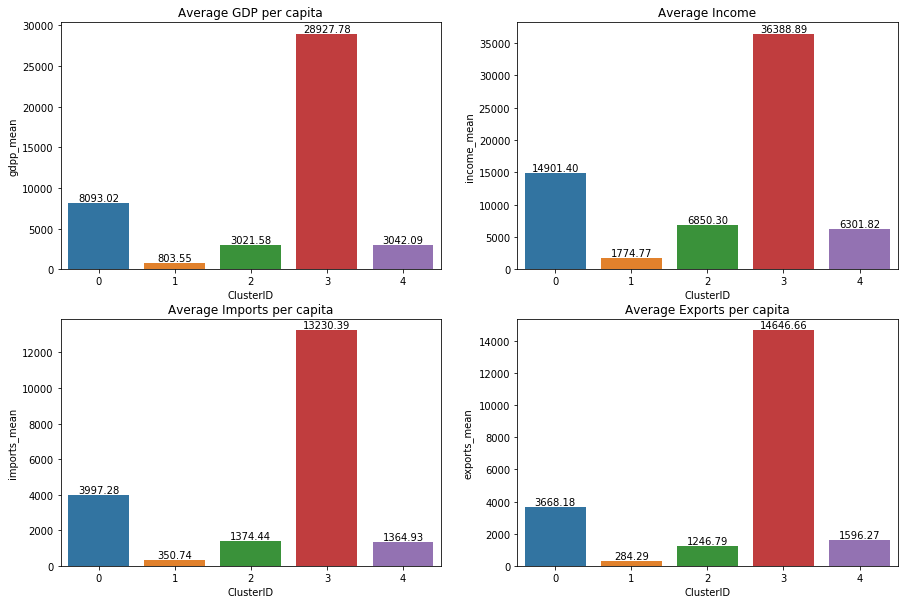

In [545]:
# Let's plot the economic factors based on cluster-ids
plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 1)
ax = sns.barplot(x=df.ClusterID, y=df.gdpp_mean)
ax.set_title('Average GDP per capita')
create_label(ax,'float')

plt.subplot(2, 2, 2)
ax = sns.barplot(x=df.ClusterID, y=df.income_mean)
ax.set_title('Average Income')
create_label(ax,'float')

plt.subplot(2, 2, 3)
ax = sns.barplot(x=df.ClusterID, y=df.imports_mean)
ax.set_title('Average Imports per capita')
create_label(ax,'float')

plt.subplot(2, 2, 4)
ax = sns.barplot(x=df.ClusterID, y=df.exports_mean)
ax.set_title('Average Exports per capita')
create_label(ax,'float')

plt.show()

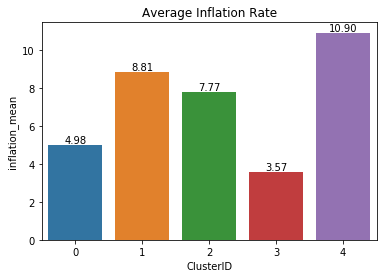

In [546]:
ax = sns.barplot(x=df.ClusterID, y=df.inflation_mean)
ax.set_title('Average Inflation Rate')
create_label(ax,'float')
plt.show()

From the above plots it can be observed that the countries falling under cluster-1 and 4 are the mostly affected countries. Let's take a look at those countries :

In [547]:
# Countries falling under cluster-1
pd.DataFrame(df_pca_cluster_country_1[df_pca_cluster_country_1.ClusterID==1]['country']).head(10)

,country
0,Afghanistan
3,Angola
14,Benin
21,Burkina Faso
22,Burundi
24,Cameroon
26,Chad
31,"Congo, Dem. Rep."
34,Cote d'Ivoire
53,Guinea


In [548]:
# Countries falling under cluster-4
pd.DataFrame(df_pca_cluster_country_1[df_pca_cluster_country_1.ClusterID==4]['country']).head(10)

,country
18,Botswana
30,Comoros
32,"Congo, Rep."
42,Equatorial Guinea
43,Eritrea
46,Gabon
47,Gambia
49,Ghana
61,Iraq
67,Kenya


So it can be observed that the countries falling under cluster-1 are similar to our observation we had during earlier clustering when we had 4 clusters. 

### Hierarchical Clustering:

In [549]:
# To perform Hierarchical clustering
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

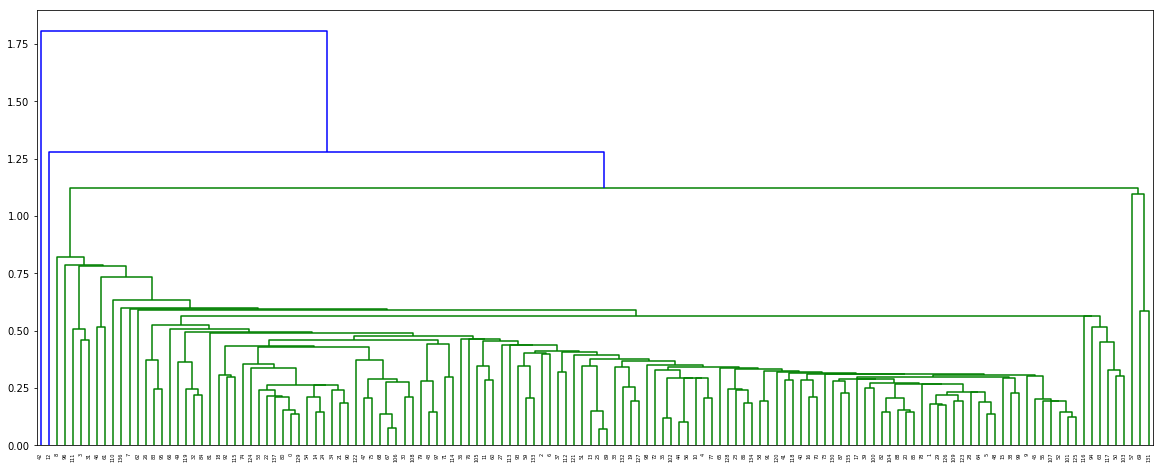

In [550]:
# heirarchical clustering
plt.figure(figsize=(20,8))
mergings = linkage(df_pca2, method = "single", metric='euclidean')
dendrogram(mergings)
plt.show()

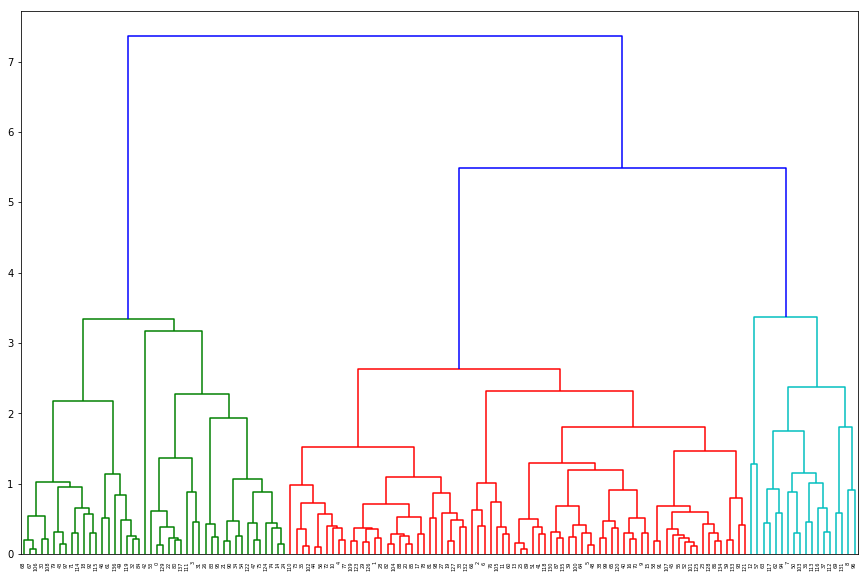

In [551]:
plt.figure(figsize=(15,10))
mergings = linkage(df_pca2, method = "complete", metric='euclidean')
dendrogram(mergings)
plt.show()

In [552]:
# Cut the dendogram at the point to create 4 clusters
clusterCut = pd.Series(cut_tree(mergings, n_clusters = 4).reshape(-1,))

In [553]:
df_pca_cluster_country_hier = pd.concat([df_pca_country, clusterCut],axis=1)
orig_col = df_pca_country.columns.tolist()
orig_col.append('ClusterID')
df_pca_cluster_country_hier.columns = orig_col
df_pca_cluster_country_hier.head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,PC1,PC2,PC3,PC4,ClusterID
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.440,56.2,5.82,553,-2.635575,1.472267,-0.549489,-0.242326,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.490,76.3,1.65,4090,-0.024206,-1.429892,-0.014123,0.450645,1
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.100,76.5,2.89,4460,-0.459557,-0.675495,0.959355,0.218456,1
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.400,60.1,6.16,3530,-2.722630,2.172332,0.600215,-0.433978,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.440,76.8,2.13,12200,0.648597,-1.023437,-0.257430,0.289201,1
5,Armenia,18.1,669.76,141.6800,1458.660,6700,7.770,73.3,1.69,3220,-0.334555,-1.271889,0.190564,0.500247,1
6,Azerbaijan,39.2,3171.12,343.3920,1208.880,16000,13.800,69.1,1.92,5840,-0.467995,-0.492682,0.609900,0.254612,1
7,Bahamas,13.8,9800.00,2209.2000,12236.000,22900,-0.393,73.8,1.86,28000,1.498962,-0.429632,-0.544543,-0.250327,2
8,Bahrain,8.6,14386.50,1028.7900,10536.300,41100,7.440,76.0,2.16,20700,1.470888,-0.328925,0.397298,0.170862,2
9,Bangladesh,49.4,121.28,26.6816,165.244,2440,7.140,70.4,2.33,758,-1.015167,-0.708743,-0.101817,0.368131,1


In [554]:
df_pca_cluster_country_hier.ClusterID.value_counts()

1    76
0    44
2    16
3     2
Name: ClusterID, dtype: int64

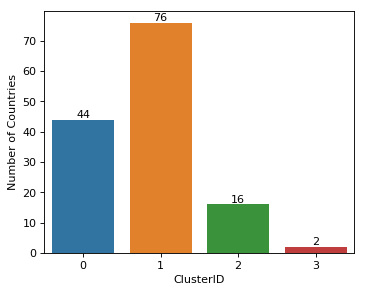

In [555]:
plt.figure(figsize=(5,4),dpi=80)
ax = sns.countplot(data=df_pca_cluster_country_hier,x='ClusterID')
create_label(ax,'integer')
ax.set_ylabel("Number of Countries")
plt.show()

In [556]:
hier_clusters_childmort = pd.DataFrame(df_pca_cluster_country_hier.groupby(["ClusterID"]).child_mort.mean())
hier_clusters_exports = pd.DataFrame(df_pca_cluster_country_hier.groupby(["ClusterID"]).exports.mean())
hier_clusters_health = pd.DataFrame(df_pca_cluster_country_hier.groupby(["ClusterID"]).health.mean())
hier_clusters_imports = pd.DataFrame(df_pca_cluster_country_hier.groupby(["ClusterID"]).imports.mean())
hier_clusters_income = pd.DataFrame(df_pca_cluster_country_hier.groupby(["ClusterID"]).income.mean())
hier_clusters_inflation = pd.DataFrame(df_pca_cluster_country_hier.groupby(["ClusterID"]).inflation.mean())
hier_clusters_life_expec = pd.DataFrame(df_pca_cluster_country_hier.groupby(["ClusterID"]).life_expec.mean())
hier_clusters_total_fer = pd.DataFrame(df_pca_cluster_country_hier.groupby(["ClusterID"]).total_fer.mean())
hier_clusters_gdpp = pd.DataFrame(df_pca_cluster_country_hier.groupby(["ClusterID"]).gdpp.mean())

In [557]:
df_hier = pd.concat([pd.Series([0,1,2,3]), hier_clusters_childmort, hier_clusters_exports, hier_clusters_health,hier_clusters_imports,\
               hier_clusters_income,hier_clusters_inflation,hier_clusters_life_expec,hier_clusters_total_fer,hier_clusters_gdpp], axis=1)
df_hier.columns = ["ClusterID", "child_mort_mean", "exports_mean", "health_mean","imports_mean",\
             "income_mean","inflation_mean","life_expec_mean","total_fer_mean","gdpp_mean"]
df_hier

,ClusterID,child_mort_mean,exports_mean,health_mean,imports_mean,income_mean,inflation_mean,life_expec_mean,total_fer_mean,gdpp_mean
0,0,87.447727,940.282841,113.670425,857.833114,4038.295455,9.858523,59.825000,4.977500,1922.818182
1,1,22.417105,2616.788007,383.481663,2858.415672,11405.526316,6.190250,72.867105,2.265658,5890.947368
2,2,6.325000,12958.981250,1998.903750,11677.350000,35943.750000,3.555000,78.700000,1.816250,27150.000000
3,3,3.550000,28148.100000,4344.700000,25654.750000,39950.000000,3.675000,81.000000,2.030000,43150.000000


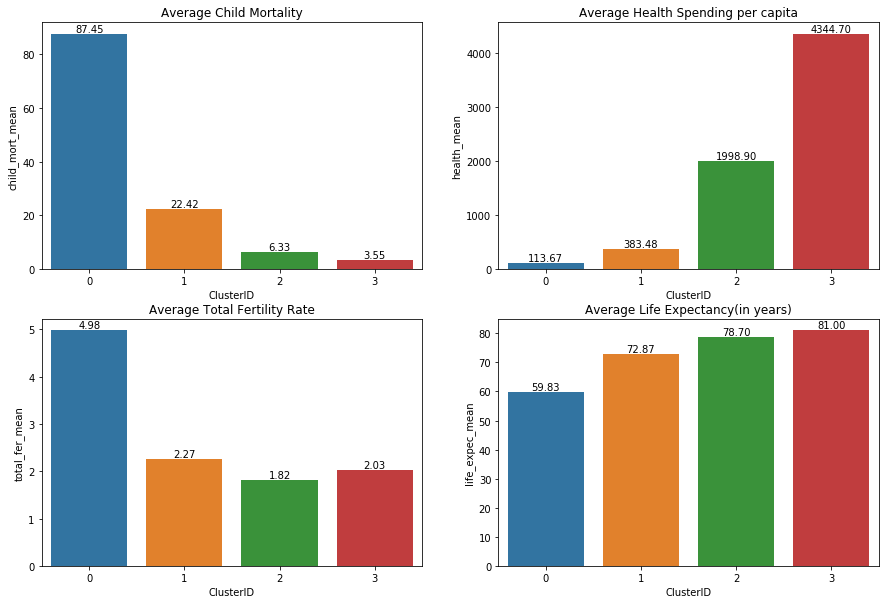

In [558]:
# Let's plot the social factors based on cluster-ids
plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 1)
ax = sns.barplot(x=df_hier.ClusterID, y=df_hier.child_mort_mean)
ax.set_title('Average Child Mortality')
create_label(ax,'float')

plt.subplot(2, 2, 2)
ax = sns.barplot(x=df_hier.ClusterID, y=df_hier.health_mean)
ax.set_title('Average Health Spending per capita')
create_label(ax,'float')

plt.subplot(2, 2, 3)
ax = sns.barplot(x=df_hier.ClusterID, y=df_hier.total_fer_mean)
ax.set_title('Average Total Fertility Rate')
create_label(ax,'float')

plt.subplot(2, 2, 4)
ax = sns.barplot(x=df_hier.ClusterID, y=df_hier.life_expec_mean)
ax.set_title('Average Life Expectancy(in years)')
create_label(ax,'float')
plt.show()

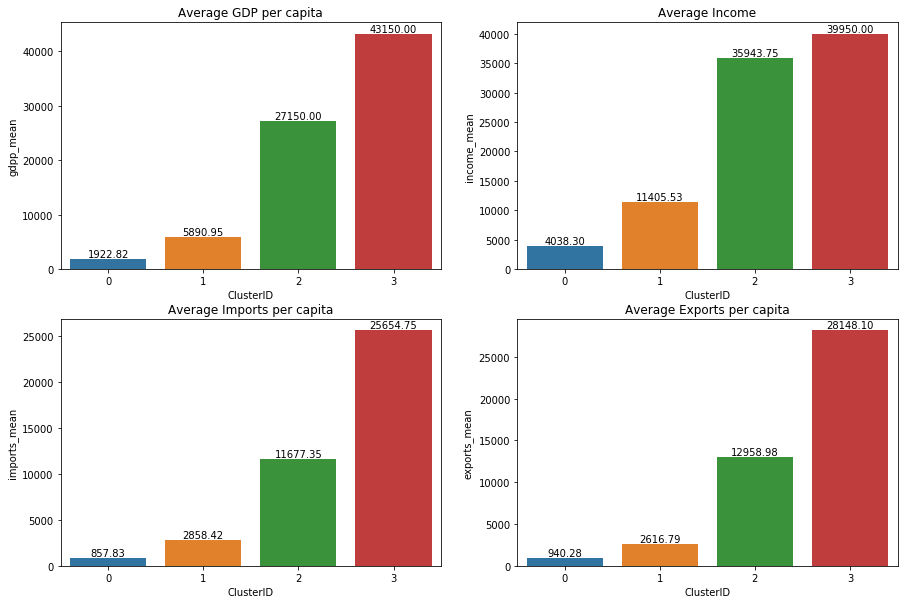

In [559]:
# Let's plot the economic factors based on cluster-ids
plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 1)
ax = sns.barplot(x=df_hier.ClusterID, y=df_hier.gdpp_mean)
ax.set_title('Average GDP per capita')
create_label(ax,'float')

plt.subplot(2, 2, 2)
ax = sns.barplot(x=df_hier.ClusterID, y=df_hier.income_mean)
ax.set_title('Average Income')
create_label(ax,'float')

plt.subplot(2, 2, 3)
ax = sns.barplot(x=df_hier.ClusterID, y=df_hier.imports_mean)
ax.set_title('Average Imports per capita')
create_label(ax,'float')

plt.subplot(2, 2, 4)
ax = sns.barplot(x=df_hier.ClusterID, y=df_hier.exports_mean)
ax.set_title('Average Exports per capita')
create_label(ax,'float')
plt.show()

From the clusters obtained by hierarchial clustering, it can be observed that clusters 0 and 1 are having high child mortality rate,total fertility rate and lowest gdpp,income and life-expectancy. Hence the countries falling under these clusters specially cluster - 0 are in dire need of aid and support.

In [560]:
# Countries falling under cluster-0
pd.DataFrame(df_pca_cluster_country_hier[df_pca_cluster_country_hier.ClusterID==0]['country']).head(10)

,country
0,Afghanistan
3,Angola
14,Benin
18,Botswana
21,Burkina Faso
22,Burundi
24,Cameroon
26,Chad
30,Comoros
31,"Congo, Dem. Rep."


In [561]:
# Countries falling under cluster-1
pd.DataFrame(df_pca_cluster_country_hier[df_pca_cluster_country_hier.ClusterID==1]['country']).head(10)

,country
1,Albania
2,Algeria
4,Antigua and Barbuda
5,Armenia
6,Azerbaijan
9,Bangladesh
10,Barbados
11,Belarus
13,Belize
15,Bhutan


Hence we can conclude that these are almost the same countries we had interpreted during k-means clustering. Thus countries falling under cluster-0 i.e Afghanistan,Angola,Benin etc. are the poorest countries with high child fertility rate and high child mortality rate. They need attention from NGO and are in dire need of aid and support.